In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0, 0.5, 'Y dataset')

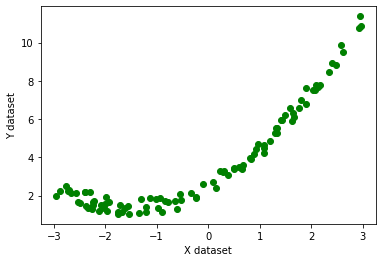

In [5]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.rand(100,1)
#quadratic equation used y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
##lets impement simple linear regression 
from sklearn.linear_model import  LinearRegression
regression_1=LinearRegression()

In [12]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [14]:
#to check the accuracy using simple linear regression 
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score) #accuracy=0.81421....

0.8142818942405691


Text(0, 0.5, 'Y')

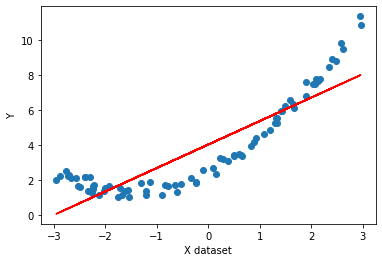

In [15]:
##lets visulaize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y")

In [16]:
#lets appply polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [20]:
X_train_poly

array([[ 1.        ,  1.59465517,  2.54292511],
       [ 1.        ,  0.66559252,  0.44301341],
       [ 1.        ,  1.89620558,  3.59559561],
       [ 1.        ,  1.90013636,  3.61051818],
       [ 1.        ,  2.62788298,  6.90576897],
       [ 1.        ,  2.09385872,  4.38424433],
       [ 1.        ,  0.89365096,  0.79861204],
       [ 1.        ,  2.12542959,  4.51745092],
       [ 1.        , -2.26206668,  5.11694568],
       [ 1.        , -0.83788517,  0.70205157],
       [ 1.        , -1.60846456,  2.58715823],
       [ 1.        ,  2.4075036 ,  5.79607358],
       [ 1.        ,  1.42025695,  2.01712979],
       [ 1.        , -0.5232968 ,  0.27383955],
       [ 1.        ,  0.64605447,  0.41738638],
       [ 1.        ,  1.48749828,  2.21265114],
       [ 1.        , -0.61335507,  0.37620444],
       [ 1.        , -0.65339883,  0.42693003],
       [ 1.        ,  1.44039985,  2.07475173],
       [ 1.        ,  1.67418745,  2.80290363],
       [ 1.        , -2.77281779,  7.688

In [23]:
#using polynomial regresion we can see th improvement in the accuracy 
#compared to simple linear regression 
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score) #accuracy=0.9880....

0.9880580540152993


In [24]:
print(regression.coef_)

[[0.         1.47970149 0.48950038]]


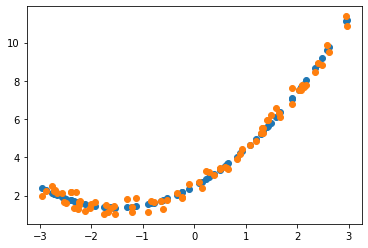

In [26]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [27]:
# prediction of new data se
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

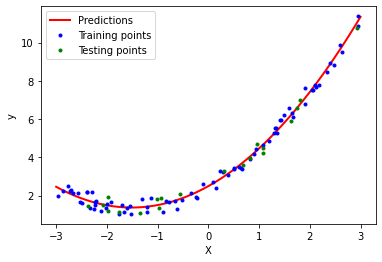

In [41]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [42]:
#PIPELINE CONCEPTS 


In [50]:
from sklearn.pipeline import Pipeline

In [51]:
#in this function you can an ener degree of polynomial you want to work with
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

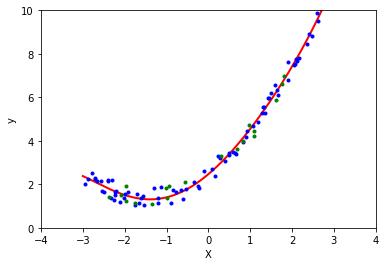

In [56]:
#perfect fit 
poly_regression(5)

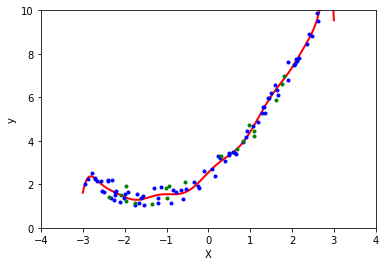

In [55]:
#overfit 
poly_regression(15)